# Datei importieren

Zunächst ist es eine gute Vorgehensweise die Daten aus der excel Datei über Pandas einzulesen, weil dies eine geeignete Programmbibliothek für die Programmiersprache Python ist. Dafür muss pandas importiert werden.

In [1]:
import pandas as pd

In einem nächsten Schritt sollte dann die Datei eingelesen werden. Dafür kann diese ins csv-Format umgewandelt werden oder auch direkt im excel Format eingelesen werden. Für mein folgendes Vorgehen, habe ich den relevanten Inhalt der Excel datei als csv gespeichert. Bei der Angabe des Pfades muss darauf geachtet werden, dass bei der Funktion "Pfad kopieren" dieser mit Backlash angegeben wird, zum auslesen müssen diese jedoch durch Schrägstriche ersetzt werden, da sonst eine Fehlermeldung auftritt.

In [2]:
df = pd.read_csv("C:/Users/Lea Frank/Documents/Studium/5_Semester/Data_Storytelling/projekt_abgabe/daten_jahre.csv", sep=';')

Um sich die ersten Zielen der Tabelle anzeigen lassen zu können verwendet man die Funktion "df.head()". Dabei wird ersichtlich, dass ein spezielles Trennzeichen gewählt wurde, welches bereits in der vorangegangenen Funktion hinter den Pfad gesetzt wird. Dieser Delimiter wird bei Pandas mit "sep" (für seperator) abgekürzt. Im vorliegenden Fall handelt es sich dabei um ein Semikolon.

In [3]:
df.head()

,Jahr,Straftat,Anzahl,TOV_bis_unter_20000_Einwohner,TOV_20000_bis_unter_100000,TOV_100000_bis_unter_500000,TOV_500000_und_mehr,TOV_unbekannt,Aufklärung_Anzahl,Aufklärung_in_%_(AQ),TV_insgesamt,TV_männlich,TV_weiblich,Nd_TV_Anzahl,Nd_TV_Anteil_an_TV_insgesamt_in_%
0,2012,Unterlassene Hilfeleistung § 323c StGB,1903,617,556,279,449,2,1566,"82,3",2070,1406,664,187,"9,0"
1,2013,Unterlassene Hilfeleistung § 323c StGB,1798,579,500,300,417,2,1484,"82,5",1910,1258,652,168,"8,8"
2,2014,Unterlassene Hilfeleistung § 323c StGB,1755,587,528,271,359,10,1452,"82,7",1848,1183,665,172,"9,3"
3,2015,Unterlassene Hilfeleistung § 323c StGB,1722,558,524,264,372,4,1364,"79,2",1773,1110,663,168,"9,5"
4,2016,Unterlassene Hilfeleistung § 323c StGB,1644,567,458,260,355,4,1295,"78,8",1677,1106,571,207,"12,3"


In [4]:
#Beschränkung auf Jahr und Anzahl
df[["Jahr", "Anzahl"]]

,Jahr,Anzahl
0,2012,1903
1,2013,1798
2,2014,1755
3,2015,1722
4,2016,1644
5,2017,1811
6,2018,1943
7,2019,1924
8,2020,1889


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Custom colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"
blue_lighter = "#BBE4FA"
grey = "#9C9C9C"
grey_dark = "#777777"
grey_light = "#B2B2B2"
orange = "#EF8733"
colors = [blue, blue_light, blue_lighter, grey_dark, grey, grey_light]

[(0.0, 2250.0)]

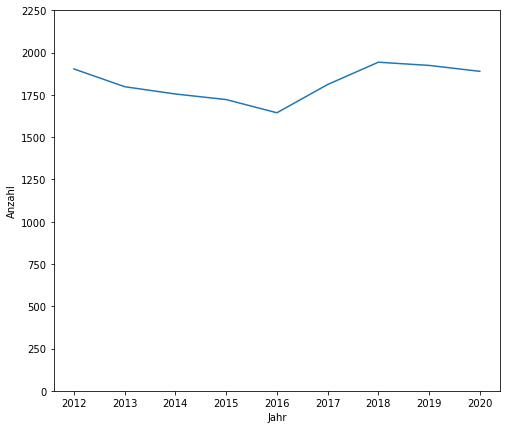

In [210]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data=df

plt.figure(figsize=(8,7))
line = sns.lineplot(data=df, x="Jahr", y="Anzahl")
line.set(ylim=(0,2250))

Da die Unterschiede zwischen den Jahren nicht komplett gravierend sind muss man sich auch manchmal mit der Größe der Figur behelfen um hervorzuheben wo der Bereich tatsächlich liegt. Zumal es verpflichtend ist die y-Achse immer mit dem Wert 0 zu beginnen.

https://stackoverflow.com/questions/25212986/how-to-set-some-xlim-and-ylim-in-seaborn-lmplot-facetgrid

aus dieser Quelle habe ich herausgefunden, wie bei seaborn die y-Achse festgesetzt werden kann.

In [149]:
df = pd.plot(df("Anzahl"), index=pd.df("Jahr"))

df = np.exp(df.cumsum())

df.plot(logy=True)

AttributeError: module 'pandas' has no attribute 'plot'

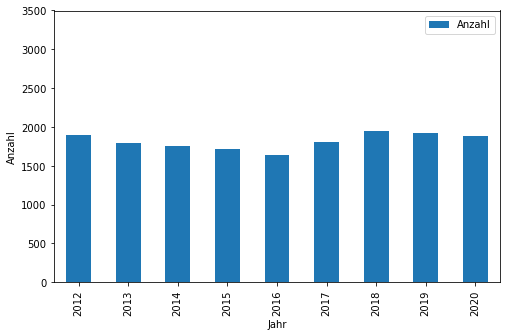

In [151]:
import pandas as pd 
import matplotlib.pyplot as plt 

data=df

df=pd.DataFrame(data,columns=["Jahr","Anzahl"])
df.plot(x="Jahr", y=["Anzahl"], kind="bar",figsize=(8,5), ylim=(0,3500))
plt.ylabel("Anzahl")
plt.show()

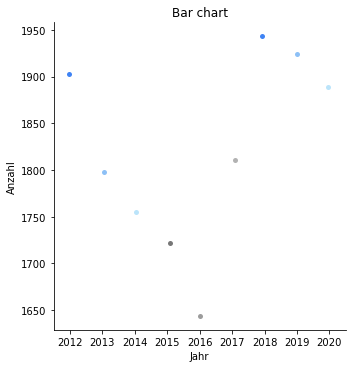

In [84]:
# Bar plots Jahr und Anzahl
import seaborn as sns
sns.catplot(x="Jahr", y = "Anzahl", palette=colors, data=df)

plt.title("Bar chart")
plt.xlabel("Jahr")

plt.show();

In [ ]:
# Tabelle für Tatverdächtige im Laufe der Zeit
pd.crosstab(df.application_type	, df.homeownership,  margins=True)

In [44]:
myframe = df.groupby('Jahr')['Anzahl'].to_frame()
myframe.plot(ylim=(0,3000))
# ToDo Grenzgewinn in Pandas ausrechnen

AttributeError: 'SeriesGroupBy' object has no attribute 'to_frame'

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Seaborn style
sns.set_theme(style="ticks", color_codes=True)

# Custom colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"
blue_lighter = "#BBE4FA"
grey = "#9C9C9C"
grey_dark = "#777777"
grey_light = "#B2B2B2"
orange = "#EF8733"
colors_blue = [blue_dark, blue, blue_light]

In [ ]:
# Dodged bar plot
sns.catplot(x="TV_insgesamt", hue="Geschlecht", kind = "count", 
            palette=colors_blue, data=df)

plt.show();

# Stacked bar chart

In [ ]:
# Stacked bar chart
# Data
joint = df.homeownership[df.application_type=="joint"].value_counts() 
individual = df.homeownership[df.application_type=="individual"].value_counts() 
labels = list(df['homeownership'].value_counts().index)

# Width of the bars: can also be len(x) sequence
width = 0.85

# Create a figure containing a single axes.
fig, ax = plt.subplots()

# Plot data on the axes
ax.bar(labels, joint, width, bottom=individual, color=blue,label='joint')
ax.bar(labels, individual, width, color=grey, label='individual')

# Define labels
ax.set_ylabel('Count')
fig.suptitle('Stacked bar chart', fontsize=14, fontweight='bold')
ax.set_title('Homeownership')

ax.legend()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show();

#fig.savefig('img/stacked-bar-chart.png')
#plt.close(fig) 

# Standardized bar plots

In [ ]:
from matplotlib import rc
# Standardized bar plot
# Data
joint = df.homeownership[df.application_type=="joint"].value_counts() 
individual = df.homeownership[df.application_type=="individual"].value_counts() 
labels = list(df['homeownership'].value_counts().index)
r = [0,1,2]
# From raw value to percentage
totals = [i+j for i,j in zip(joint, individual)]
joint_bar = [i / j * 100 for i,j in zip(joint, totals)]
individual_bar = [i / j * 100 for i,j in zip(individual, totals)]
# plot
barWidth = 0.85
plt.bar(r, individual_bar, color=grey, edgecolor='white', width=barWidth, label="individual")
plt.bar(r, joint_bar, bottom=individual_bar, color=blue, edgecolor='white', width=barWidth, label="joint")
# Custom axis
plt.xticks(r, labels)
plt.xlabel("Homeownership")
plt.ylabel("Proportion")
# Add a legend and title
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title("Standardized bar chart") 
# Save graphic
plt.savefig('img/standard-bar-chart.png')
plt.close(fig) 


Standardized bar plots bieten sich bei meiner Art der Untersuchung und Präsentation nicht an, weil die Mengenunterschiede nicht so eindeutig sind, wie bei den stacked bar charts.  

Mosaic plots habe ich gar nicht erst getestet, da sich diese nicht eignen. 

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

# Custom colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"
blue_lighter = "#BBE4FA"
grey = "#9C9C9C"
grey_dark = "#777777"
grey_light = "#B2B2B2"
orange = "#EF8733"
colors = [blue, blue_light, blue_lighter, grey_dark, grey, grey_light]
colorsTV1 = [blue_light]
colorsTV2 = [blue_lighter]

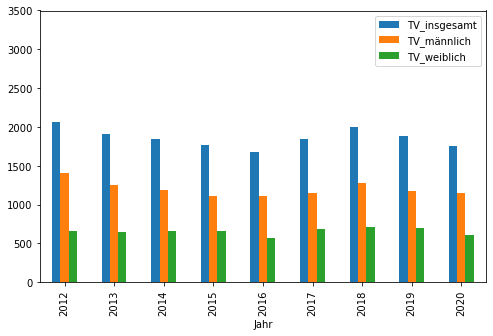

In [156]:
import pandas as pd 
import matplotlib.pyplot as plt 

data=df

df=pd.DataFrame(data,columns=["Jahr","TV_insgesamt","TV_männlich","TV_weiblich"])
df.plot(x="Jahr", y=["TV_insgesamt","TV_männlich","TV_weiblich"], kind="bar",figsize=(8,5), ylim=(0,3500))
plt.show()

Weder die Skalierung noch die Anordnung sind aussagekräftig, da die Unterscheidungen nicht optimal hervorgehoben werden.

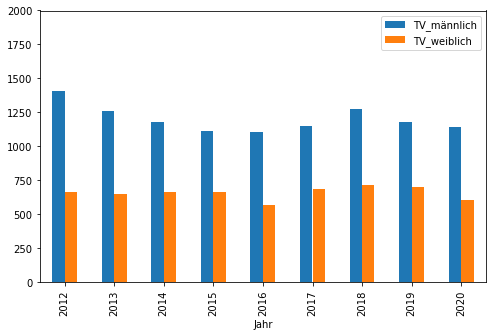

In [158]:
import pandas as pd 
import matplotlib.pyplot as plt 

data=df

df=pd.DataFrame(data,columns=["Jahr","TV_männlich","TV_weiblich"])
df.plot(x="Jahr", y=["TV_männlich","TV_weiblich"], kind="bar",figsize=(8,5), ylim=(0,2000))
plt.show()

Bei dieser Art der Anzeige kommen die Unterschiede zwischen der Anzahl der weiblichen und männlichen Tatverdächtigen gut zur Geltung. 

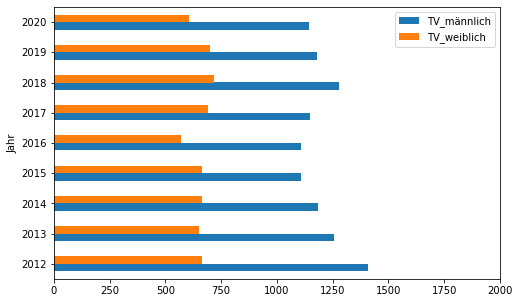

In [160]:
import pandas as pd 
import matplotlib.pyplot as plt 

data=df

df=pd.DataFrame(data,columns=["Jahr","TV_männlich","TV_weiblich"])
df.plot.barh(x="Jahr", y=["TV_männlich","TV_weiblich"],figsize=(8,5), xlim=(0,2000))
plt.show()

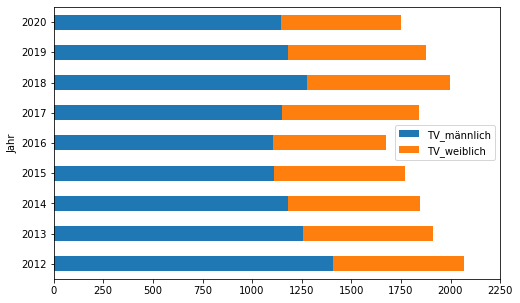

In [166]:

import pandas as pd 
import matplotlib.pyplot as plt 

data=df

df=pd.DataFrame(data,columns=["Jahr","TV_männlich","TV_weiblich"])
df.plot.barh(x="Jahr", y=["TV_männlich","TV_weiblich"],figsize=(8,5), xlim=(0,2250), stacked=True)
plt.show()

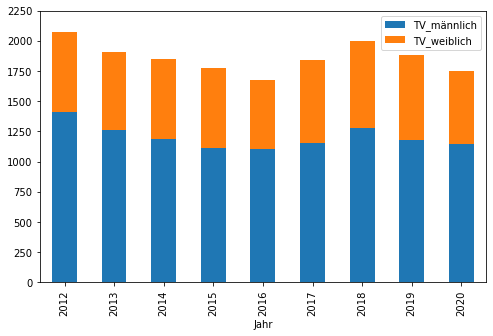

In [170]:

import pandas as pd 
import matplotlib.pyplot as plt 

data=df

df=pd.DataFrame(data,columns=["Jahr","TV_männlich","TV_weiblich"])
df.plot.bar(x="Jahr", y=["TV_männlich","TV_weiblich"],figsize=(8,5), ylim=(0,2250), stacked=True)
plt.show()